In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from xmitgcm import open_mdsdataset

from new_smooth_store import open_smoothdataset

In [2]:
grid_dir = '/scratch2/tsmith/generic-matern-covariance/sampling/llc90/grid'

In [3]:
ds = open_mdsdataset(grid_dir, geometry='llc', iters=None)

/home/tsmith/xmitgcm/xmitgcm/mds_store.py:924: UserWarning: Couldn't find available_diagnostics.log in /scratch2/tsmith/generic-matern-covariance/sampling/llc90/grid or /scratch2/tsmith/generic-matern-covariance/sampling/llc90/grid. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "


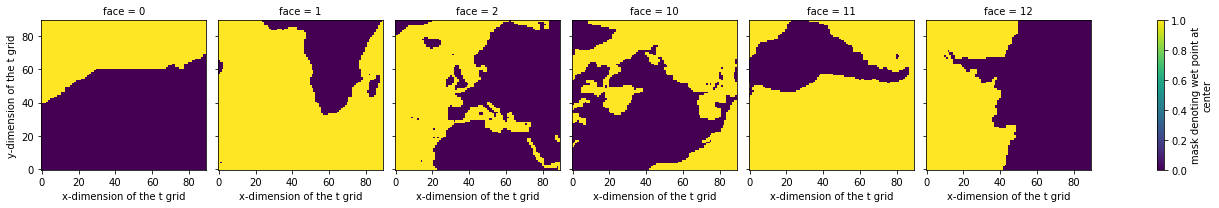

In [10]:
ds.sel(face=[0,1,2,10,11,12]).maskC.isel(k=0).plot(col='face')

In [27]:
def get_atlantic(xds):
    
    xds = xds.sel(face=[0, 1, 2, 10, 11, 12])
    
    xlist = []
    for face in [0, 1, 2]:
        
        xx = xds.sel(face=face)
        jnew = np.arange(90) + face*90
        xx['j_new'] = xr.DataArray(jnew, coords=xds.j.coords, dims=xds.j.dims)
        xx = xx.swap_dims({'j':'j_new'}).drop('j').rename({'j_new':'iy'})
        
        inew = np.arange(90, 180)
        xx['i_new'] = xr.DataArray(inew, coords=xds.i.coords, dims=xds.i.dims)
        xx = xx.swap_dims({'i':'i_new'}).drop('i').rename({'i_new':'ix'})
        
        xlist.append(xx)
        
    atl1 = xr.concat(xlist, dim='iy')
    
    xlist = []
    for face in [10,11,12]:
        
        xx = xds.sel(face=face)
        i = 12-face
        inew = np.arange(89,-1,-1)+i*90
        xx['i_new'] = xr.DataArray(inew, xds.i.coords, xds.i.dims)
        xx = xx.swap_dims({'i':'i_new'}).drop('i').rename({'i_new':'iy'})
        
        jnew = np.arange(90)
        xx['j_new'] = xr.DataArray(jnew, xds.j.coords, xds.j.dims)
        xx = xx.swap_dims({'j':'j_new'}).drop('j').rename({'j_new':'ix'})
        xlist.append(xx)

    atl2 = xr.concat(xlist, dim='iy')
    atl = xr.concat([atl2, atl1], dim='ix')
    atl['ix'].attrs = {'long_name':'Real x direction',
                       'standard_name': 'x_index'
                      }
    atl['iy'].attrs = {'long_name':'Real y direction',
                       'standard_name': 'y_index'
                      }
    return atl

In [28]:
a = get_atlantic(ds)

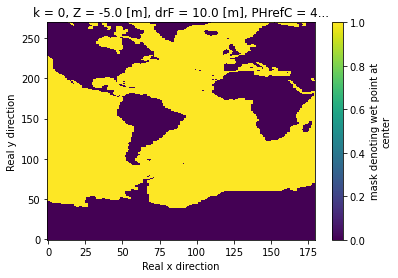

In [30]:
a.maskC.isel(k=0).plot(x='ix')